In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset  and Describe MNIST dataset


(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
print("MNIST dataset:")
print("Number of training samples:", x_train_mnist.shape[0])
print("Number of testing samples:", x_test_mnist.shape[0])
print("Image shape:", x_train_mnist[0].shape)
print("Data type of images:", x_train_mnist.dtype)
print("Minimum pixel value:", np.min(x_train_mnist))
print("Maximum pixel value:", np.max(x_train_mnist))
print("Number of classes:", len(np.unique(y_train_mnist)))

11490434/11490434 [==============================] - 0s 0us/step
MNIST dataset:
Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)
Data type of images: uint8
Minimum pixel value: 0
Maximum pixel value: 255
Number of classes: 10


In [3]:
# Load Fashion MNIST dataset and Describe Fashion MNIST dataset


(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
print("\nFashion MNIST dataset:")
print("Number of training samples:", x_train_fashion.shape[0])
print("Number of testing samples:", x_test_fashion.shape[0])
print("Image shape:", x_train_fashion[0].shape)
print("Data type of images:", x_train_fashion.dtype)
print("Minimum pixel value:", np.min(x_train_fashion))
print("Maximum pixel value:", np.max(x_train_fashion))
print("Number of classes:", len(np.unique(y_train_fashion)))

4422102/4422102 [==============================] - 0s 0us/step

Fashion MNIST dataset:
Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)
Data type of images: uint8
Minimum pixel value: 0
Maximum pixel value: 255
Number of classes: 10


In [4]:
# preprocessing of Mnist dataset


#normalize
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0


#flattening
x_train_mnist_flat = x_train_mnist.reshape(x_train_mnist.shape[0], -1)
x_test_mnist_flat = x_test_mnist.reshape(x_test_mnist.shape[0], -1)


In [5]:
#preprocessing the Fashion-mnist dataset

#Normalize
x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0

#flattening the image
x_train_fashion_flat = x_train_fashion.reshape(x_train_fashion.shape[0], -1)
x_test_fashion_flat = x_test_fashion.reshape(x_test_fashion.shape[0], -1)

**Defining The Models**


In [6]:
#Single layer preceptron

def single_layer_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(10, activation='softmax')
    ])
    return model

In [7]:
#Multi layer preceptron

def mlp_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [8]:
#Fully connected DNN

def fully_connected_dnn(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [19]:
#Training the models
def train_model(model, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Test Loss:", loss*100)
    print("Test Accuracy:", accuracy*100)
    return history


In [16]:

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

In [17]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Single Layer Network for MNIST:
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4683 - accuracy: 0.8784 - val_loss: 0.3080 - val_accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9150 - val_loss: 0.2838 - val_accuracy: 0.9193
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9210 - val_loss: 0.2702 - val_accuracy: 0.9240
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2737 - accuracy: 0.9240 - val_loss: 0.2686 - val_accuracy: 0.9255
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9258 - val_loss: 0.2667 - val_accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9267 - val_loss: 0.2674 - val_accuracy: 0.9253
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2587 - accuracy: 0.9287 - 

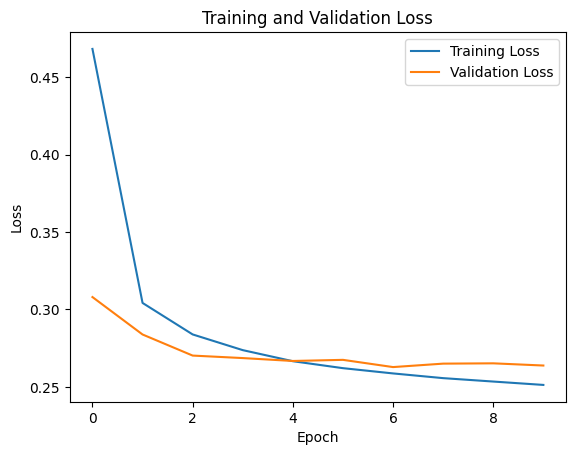

In [20]:
# Single Layer Perceptron for MNIST
input_shape_mnist = x_train_mnist_flat[0].shape
print("Single Layer Network for MNIST:")
model_mnist_single = single_layer_model(input_shape_mnist)
history_single_mnist = train_model(model_mnist_single, x_train_mnist_flat, y_train_mnist, x_test_mnist_flat, y_test_mnist)
plot_loss(history_single_mnist)


Multi-Layer Perceptron for MNIST:
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2583 - accuracy: 0.9264 - val_loss: 0.1399 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1109 - accuracy: 0.9669 - val_loss: 0.1037 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.0850 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0688 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0757 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0275 - accuracy: 0.991

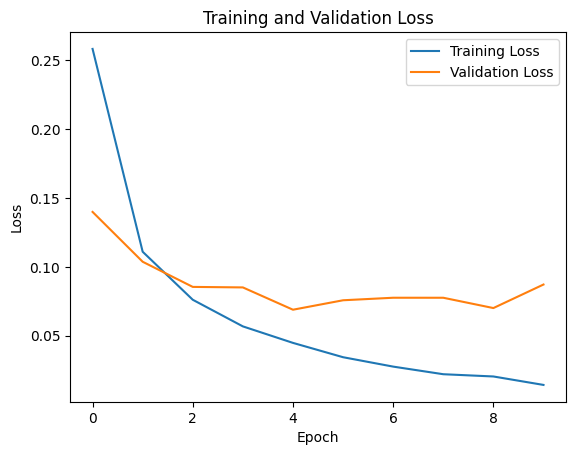

In [22]:
# Multi Layer Perceptron for MNIST
print("\nMulti-Layer Perceptron for MNIST:")
model_mnist_mlp = mlp_model(input_shape_mnist)
history_mlp_mnist = train_model(model_mnist_mlp, x_train_mnist_flat, y_train_mnist, x_test_mnist_flat, y_test_mnist)
plot_loss(history_mlp_mnist)


Fully Connected DNN for MNIST:
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2146 - accuracy: 0.9364 - val_loss: 0.1176 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0925 - accuracy: 0.9705 - val_loss: 0.0819 - val_accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0643 - accuracy: 0.9792 - val_loss: 0.0917 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0927 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0893 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0866 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0289 - accuracy: 0.

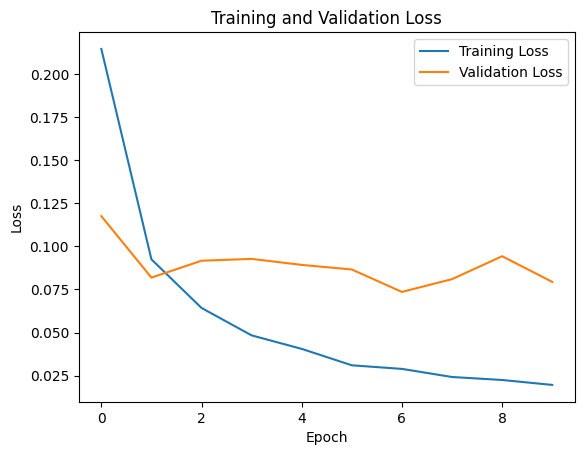

In [23]:
# Fully connected DNN for MNIST
print("\nFully Connected DNN for MNIST:")
model_mnist_fully_connected = fully_connected_dnn(input_shape_mnist)
history_dnn_mnist = train_model(model_mnist_fully_connected, x_train_mnist_flat, y_train_mnist, x_test_mnist_flat, y_test_mnist)
plot_loss(history_dnn_mnist)


Single Layer Network for Fashion MNIST:
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.7974 - val_loss: 0.5253 - val_accuracy: 0.8132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8417 - val_loss: 0.5013 - val_accuracy: 0.8265
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4352 - accuracy: 0.8504 - val_loss: 0.4639 - val_accuracy: 0.8389
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4227 - accuracy: 0.8538 - val_loss: 0.4502 - val_accuracy: 0.8435
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8571 - val_loss: 0.4487 - val_accuracy: 0.8442
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4066 - accuracy: 0.8598 - val_loss: 0.4453 - val_accuracy: 0.8460
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4024 - accuracy: 

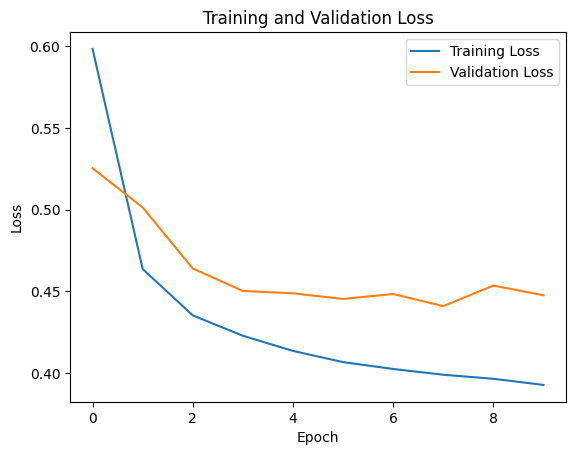

In [24]:
# Single Layer Perceptron for Fashion MNIST
input_shape_fashion = x_train_fashion_flat[0].shape
print("\nSingle Layer Network for Fashion MNIST:")
model_fashion_single = single_layer_model(input_shape_fashion)
history_single_fashion = train_model(model_fashion_single, x_train_fashion_flat, y_train_fashion, x_test_fashion_flat, y_test_fashion)
plot_loss(history_single_fashion)


Multi-Layer Perceptron for Fashion MNIST:
Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5033 - accuracy: 0.8232 - val_loss: 0.4212 - val_accuracy: 0.8481
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8645 - val_loss: 0.4192 - val_accuracy: 0.8505
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3378 - accuracy: 0.8775 - val_loss: 0.3664 - val_accuracy: 0.8691
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.8846 - val_loss: 0.3605 - val_accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.8923 - val_loss: 0.3790 - val_accuracy: 0.8661
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2814 - accuracy: 0.8962 - val_loss: 0.3450 - val_accuracy: 0.8794
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2691 - accuracy

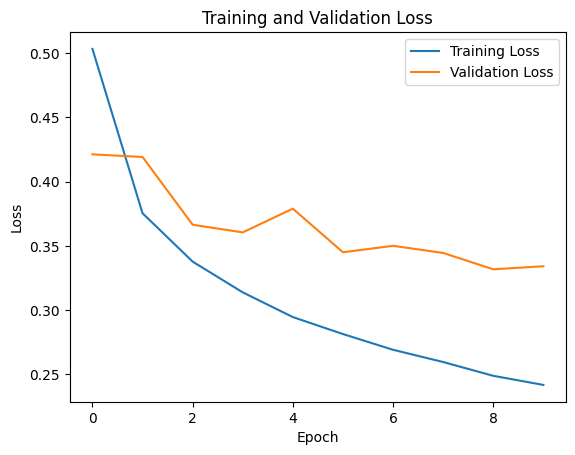

In [25]:
# Multi Layer Perceptron for Fashion MNIST
print("\nMulti-Layer Perceptron for Fashion MNIST:")
model_fashion_mlp = mlp_model(input_shape_fashion)
history_mlp_fashion = train_model(model_fashion_mlp, x_train_fashion_flat, y_train_fashion, x_test_fashion_flat, y_test_fashion)
plot_loss(history_mlp_fashion)



Fully Connected DNN for Fashion MNIST:
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4886 - accuracy: 0.8227 - val_loss: 0.4101 - val_accuracy: 0.8535
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3644 - accuracy: 0.8662 - val_loss: 0.4014 - val_accuracy: 0.8551
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3282 - accuracy: 0.8793 - val_loss: 0.3847 - val_accuracy: 0.8609
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3056 - accuracy: 0.8870 - val_loss: 0.3566 - val_accuracy: 0.8717
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2882 - accuracy: 0.8944 - val_loss: 0.3528 - val_accuracy: 0.8740
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2728 - accuracy: 0.8972 - val_loss: 0.3506 - val_accuracy: 0.8741
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2635 - accu

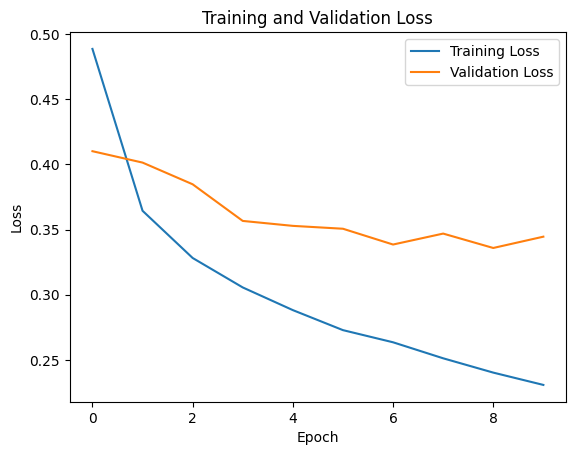

In [26]:
# Fully connected DNN for Fashion MNIST
print("\nFully Connected DNN for Fashion MNIST:")
model_fashion_fully_connected = fully_connected_dnn(input_shape_fashion)
history_dnn_fashion = train_model(model_fashion_fully_connected, x_train_fashion_flat, y_train_fashion, x_test_fashion_flat, y_test_fashion)
plot_loss(history_dnn_fashion)

313/313 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8864


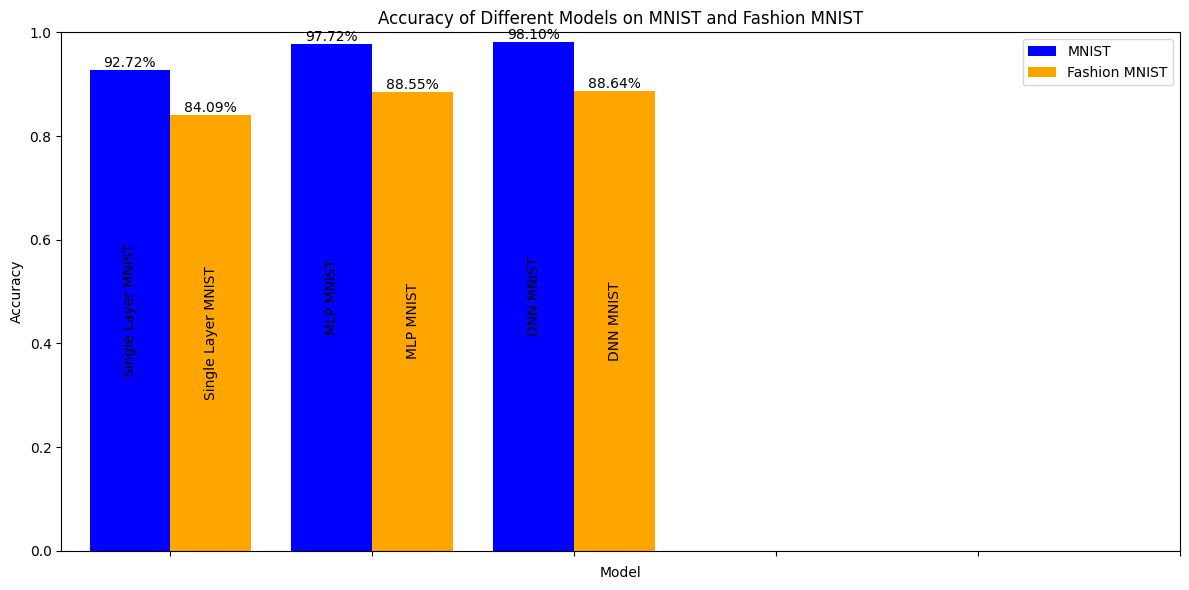

In [32]:
# Collect accuracies
mnist_accuracies = [
    model_mnist_single.evaluate(x_test_mnist_flat, y_test_mnist)[1],
    model_mnist_mlp.evaluate(x_test_mnist_flat, y_test_mnist)[1],
    model_mnist_fully_connected.evaluate(x_test_mnist_flat, y_test_mnist)[1]
]

fashion_mnist_accuracies = [
    model_fashion_single.evaluate(x_test_fashion_flat, y_test_fashion)[1],
    model_fashion_mlp.evaluate(x_test_fashion_flat, y_test_fashion)[1],
    model_fashion_fully_connected.evaluate(x_test_fashion_flat, y_test_fashion)[1]
]

# Model names
model_names = ['Single Layer MNIST', 'MLP MNIST', 'DNN MNIST', 'Single Layer Fashion MNIST', 'MLP Fashion MNIST', 'DNN Fashion MNIST']

# Plotting bar graph with accuracy percentages and model names inside the bars
# Plotting bar graph with accuracy percentages and model names inside the bars
plt.figure(figsize=(12, 6))

bars1 = plt.bar(np.arange(len(model_names[:3])) - 0.2, mnist_accuracies, color='blue', width=0.4, label='MNIST')
bars2 = plt.bar(np.arange(len(model_names[3:])) + 0.2, fashion_mnist_accuracies, color='orange', width=0.4, label='Fashion MNIST')

# Adding accuracy percentages on top of bars
for bars, accuracies in [(bars1, mnist_accuracies), (bars2, fashion_mnist_accuracies)]:
    for bar, accuracy, model_name in zip(bars, accuracies, model_names):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2%}', ha='center', va='bottom')
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, model_name, ha='center', va='center', color='black', rotation=90)

plt.title('Accuracy of Different Models on MNIST and Fashion MNIST')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(model_names)), [])
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy percentage
plt.legend()
plt.tight_layout()
plt.show()
